In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
features_url = "http://128.114.25.154:8888/IFCB104/D20210629T161913_IFCB104_fea_v2.csv"
autoclass_url = "http://128.114.25.154:8888/IFCB104/D20210629T161913_IFCB104_class_scores.csv"


df_features = pd.read_csv(features_url)
df_autoclass = pd.read_csv(autoclass_url) # These are percentage of counts
df_features.shape

(1719, 26)

In [3]:
df_features.columns

Index(['trigger', 'processingEndTime', 'pmtA', 'pmtB', 'pmtC', 'pmtD', 'peakA',
       'peakB', 'peakC', 'peakD', 'timeOfFlight', 'grabTimeStart',
       'frameGrabTime', 'bottom', 'left', 'height', 'width', 'byteOffset',
       'comparatorOut', 'startPoint', 'signalStrength', 'valveStatus', 'binID',
       'pid', 'stitched', 'targetNumber'],
      dtype='object')

In [4]:
totals = df_autoclass.apply(lambda x: x == df_autoclass.max(axis=1)).sum()
totals = totals.reset_index(name='counts')
totals = totals.rename(columns={'index':'class'})
totals = totals.sort_values(['counts']).reset_index(drop=True)
totals = totals.drop(totals[totals['class'].isin(["pid", "Skeletonema",	"Thalassionema", "Thalassiosira", "unclassified"])].index)
totals.head()

,class,counts
3,Pseudo-nitzschia,0
4,Prorocentrum,0
5,Lingulodinium,0
6,Guin_Dact,0
7,Dinophysis,0


Text(0.5, 1.0, 'Total Detections: 1719')

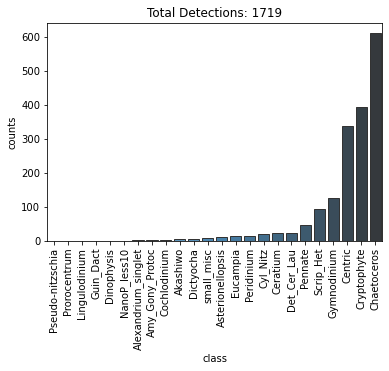

In [9]:
ax = sns.barplot(x="class", y="counts", data=totals,  palette="Blues_d",edgecolor=".2");
plt.xticks(rotation=90, ha='center');
plt.title("Total Detections: {}".format(df_features.shape[0]))